## **Project 1 - Pac-man**

Deadline: 04/05/2020


To solve the problem, we define:

*   The state representation
*   The set of actions
*   The objective state test
*   The cost of the path (g(x))




**Hypothesis:**

For all the methods used to find a solution, we will assume the following hypothesis:



*   the problem is completely observable and deterministic
*   Pac-man is going to reason about the solution before actually adopting it.
*   there is no time limit for Pac-man to go from initial position to the goal
*   from the previous hypothesis, the path taken isn't important, only the final goal matters
*   there is a cost g(x) for a movement in any direction
*   there is a point function p(x) when going by grey areas


The black areas are non-traversable walls, the grey path represents elements
that should be caught by the agent, and the white areas are traversable areas.

# **Setting up the environment**




Let's first check the configuration of the environment

In [0]:
!cat /proc/cpuinfo
!cat /proc/meminfo

In [0]:
!python3 --version

Python 3.6.9


Execute the following cells to install all the dependencies:

1.   clone the project from https://github.com/lucaslzl/search_ia_p1
2.   clone the project from https://github.com/aimacode/aima-python
1.   we then move the folder aimacode into search_ia_p1




In [1]:
!git clone https://github.com/lucaslzl/search_ia_p1.git

!git clone https://github.com/aimacode/aima-python

import shutil
shutil.move("/content/aima-python", "/content/search_ia_p1") 

Cloning into 'search_ia_p1'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1243 (delta 30), reused 40 (delta 30), pack-reused 1202
Receiving objects: 100% (1243/1243), 17.74 MiB | 28.25 MiB/s, done.
Resolving deltas: 100% (710/710), done.
Cloning into 'aima-python'...
remote: Enumerating objects: 5035, done.
remote: Total 5035 (delta 0), reused 0 (delta 0), pack-reused 5035
Receiving objects: 100% (5035/5035), 17.36 MiB | 27.73 MiB/s, done.
Resolving deltas: 100% (3369/3369), done.


'/content/search_ia_p1/aima-python'

Change the following paths:



1.   in main.py, line 131, change path to '/content/search_ia_p1/maps/map1.txt'
2.   in work.py, line 3, change path to "/content/search_ia_p1/aima-python"

In [0]:
import sys
sys.path.append("/content/search_ia_p1/aima-python")

In [0]:
import search

In [0]:
!python3 /content/search_ia_p1/main.py --bfs --map="/content/search_ia_p1/maps2/no_points/map1.txt"

A.ction Legend:
            1/E = LEFT
            2/D = RIGHT
            3/B = DOWN
            4/C = UP


Criando mapa
Criando mapa OK.
Criando problema
Criando problema OK
Executando BreadthFirst
Executando BreadthFirst OK
Time: 0.0020248889923095703
Node: 73
Expa: 68
Pont: 0
Left: 0
Acti: 22
A.ctions:  [1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 3, 3, 1, 1, 3, 3, 2, 2]
--------------------------------------------




In [0]:
map = [ ["map1", 2], ["map2", 3], ["map3", 2], ["map4", 2], ["map5", 1], ["map6", 4],["map7", 26], ["map8", 9], ["map9", 3], ["map10", 2], ["map11", 2], ["map12", 1], ["map13", 3], ["map14", 2], ["map15", 1]]

In [0]:
import sys
sys.path.append("/content/search_ia_p1/strategies")
import lbs
from lbs import *
print(return_k_value_for(6))

26


In [0]:
a = [3, 2, 5, 10 ,15]
a.sort(reverse=True)
print( a )
kkkk = a[:40]
print( kkkk )

[15, 10, 5, 3, 2]
[15, 10, 5, 3, 2]


# **Local search method**


For this method, we choose the local beam search. The local beam search algorithm keeps track of k states. 

The objective is to first find the goal, and, if the goal isn't found yet, to increase the number of points collected along the path to the goal. 

Since the local beam search grabs k good neighbor states without thinking ahead about where to go next, this algorithm is greedy. It tries to increase the objective function which is for Pac-man to collect as many points as possible (the optimization problem). The path to the goal is irrelevant. 

For those reasons, adopting the local beam search method is appropriate to this problem.

Including the problem at hand, the steps for the algorithm are the following:


1.   begin with k randomly generated states
2.   all the successors of all k states are generated
1.   if anyone of the successor is the goal, the algorithm stops
2.   else we select the k best successors from the complete list of successors by choosing the state that increase the number of points, and 
1.   repeat the process








In [0]:
def k_states_local_beam_search(problem, k):
    """
    From the initial node, Select randomly k states,
    From all the successors, select the k neighbors with highest value,
    Stopping when goal is found or no more successor
    Else repeat process
    """
    current = Node(problem.initial)
    k_successors = random.choices(current.expand(problem), k=k)
    #check if there are successors to the k successors selected
    if not k_successors:
        break
    explored = set()
    
    while True:
        all_successors = []
        #Generate the successors of all the k best states
        for successor in k_successors:
          children = successor.expand(problem)
          for child in children:
            if child not in explored and child not in all_successors:
              all_successors.add(child)
        #if there is no successor, we stop
        if not all_successors:
            break
        #check if any successor is a goal
        for successor in all_successors:
          if problem.goal_test(successor.state):
              break
        #Select the k best successors
        all_successors.sort(key=lambda node: problem.value(node.state), reverse=True)
        k_successors = all_successors[:k]
        #Mark the k successors as explored, to avoid exploring same nodes
        for successor in k_successors:
          explored.add(successor.state)
    
    return explored

In [0]:
from core.work import Problem, Node
import random

k_width = 3

def k_states_local_beam_search(problem):
    """
    From the initial node, Select randomly k states,
    From all the successors, select the k neighbors with highest value,
    Stopping when goal is found or no more successor
    Else repeat process
    """
    current = Node(problem.initial)
    
    if k_width >= len(current.expand(problem)):
      k_successors = current.expand(problem)
    else:
      k_successors = random.sample(current.expand(problem), k=k_width)

    #check if there are successors to the k successors selected
    if not k_successors:
        return
    
    explored = set()
    explored_positions = []
    goal_found = False

    explored_positions.append(current.state.pos)
    for successor in k_successors:
      explored_positions.append(successor.state.pos)

    while goal_found == False:  
      all_successors = []
      possible_positions = []

      #Generate the successors of all the k best states
      for successor in k_successors:
        children = successor.expand(problem)
        for child in children:
          if child.state not in explored and child.state.pos not in possible_positions and child.state.pos not in explored_positions and child not in all_successors:
            all_successors.append(child)
            possible_positions.append(child.state.pos)
      
      #if there is no successor, we stop
      if not all_successors:
        break
      
      #check if any successor is a goal
      for successor in all_successors:
        if problem.goal_test(successor.state):
          goal_found = True
      
      #Select the k best successors
      all_successors.sort(key=lambda node: problem.value(node.state), reverse=False)
      k_successors = all_successors[:k_width]
      
      #Mark the k successors as explored, to avoid exploring same nodes
      for successor in k_successors:
        explored.add(successor.state)
        explored_positions.append(successor.state.pos)

    return None

In [0]:
from core.work import Problem, Node
import random

map_array = [ ["map1", 2], ["map2", 3], ["map3", 2], ["map4", 2], ["map5", 1], ["map6", 4],["map7", 26], ["map8", 9], ["map9", 3], ["map10", 2], ["map11", 2], ["map12", 1], ["map13", 3], ["map14", 2], ["map15", 1]]

def return_k_value_for(index):
  if index < len(map_array):
    return map_array[index][1]
  return 0

def local_beam_search(problem, k_width):
    """
    From the initial node, Select randomly k states,
    From all the successors, select the k neighbors with highest value,
    Stopping when goal is found or no more successor
    Else repeat process
    """
    current = Node(problem.initial)

    if k_width >= len(current.expand(problem)):
      k_successors = current.expand(problem)
    else:
      k_successors = random.sample(current.expand(problem), k=k_width)

    #check if there are successors to the k successors selected
    if not k_successors:
        return None
    
    explored = set()
    goal_found = False

    while goal_found == False:  
      all_successors = []

      #Generate the successors of all the k best states
      for successor in k_successors:
        children = successor.expand(problem)
        for child in children:
          if child.state not in explored and child not in all_successors:
            all_successors.append(child)
      
      #if there is no successor, we stop
      if not all_successors:
        print("No solution found with width =", k_width)
        break
      
      #check if any successor is a goal
      for successor in all_successors:
        if problem.goal_test(successor.state):
          goal_found = True
          print("Solution found for width =", k_width)
          return successor
      
      #Select the k best successors
      all_successors.sort(key=lambda node: node.state.getPoints(), reverse=False)
      k_successors = all_successors[:k_width]
      
      #Mark the k successors as explored, to avoid exploring same nodes
      for successor in k_successors:
        explored.add(successor.state)

    return None
      
def k_states_local_beam_search(problem, k=1):
  k_max = 100
  result = None
  while result == None:
    result = local_beam_search(problem, k)
    k = k + 1
    if k > k_max:
      break
  
  return result
   


To do:


*   try different values for k, get memory, time, and whether we find a solution everytime.
*   keep k constant, try different maps
*   List item
*   List item





# **Comparison of the different search methods** 

**Report**

The system must be evaluated according to the quality of the solutions found and a critical evaluation is expected on
the relationship between adopted parameters x solution performance. Graphs and tables representing the evolution of
the solutions are expected. Additional comparisons with the literature are welcome, although they are not mandatory.

The work consists of finding an adequate solution to the chosen problem, evaluating it according to: computational
cost, completeness, optimality. Your are required to clearly define:


*   How the problem was modeled
*   Implementation specifics and restrictions


**Questions:**


*   how do we define an optimal solution
*   List item





# **Local Search Method: Local Beam Search**

For this method, we choose the local beam search. The local beam search algorithm keeps track of k states. 

The objective is to first find the goal, and, if the goal isn't found yet, to get as many points collected along the path to the goal as possible. 

Since the local beam search grabs k good neighbor states without thinking ahead about where to go next, this algorithm is greedy. In fact, it tries to increase the objective function which is for Pac-man to collect as many points as possible (the optimization problem). The path to the goal is irrelevant. The way the search method works is that it selects the best successors ranked by the points they have at their position.

For those reasons, adopting the local beam search method is appropriate for this problem.

The steps for the algorithm are the following:


1.   begin with k randomly generated states
2.   all the successors of all k states are generated
1.   if anyone of the successor is the goal, the algorithm stops
2.   else we select the k best successors from the complete list of successors by choosing the state that increase the number of points, and 
1.   repeat the process

The way we choose k is by iteration. We first try to find the solution (finding a path for Pac-man to reach the goal from its initial position) with k=10. If, after the search method ends, it doesn't find a solution, we increase the value of k by 5 and repeat the search. This process continues until, the search either finds a solution or k reaches the maximum value of 5010. 

In most cases, the search method finds a solution for a value of k usually equal to 2 (for small and most medium-sized maps). Again we start with a value of 10 for k to increase the chances to get the maximum number of points along the path to the goal. 

However for much bigger maps, the solution is found if we increase the search width. This means that the search wasted time finding a solution with previous, lower values of k. This is the first critic of this method, the person selecting the local beam search has to know the problem at hand deeply to select an adequate value for k. We could have simulated the local beam search on various maps, with different sizes and number of points, to find "rules" to select an appropriate width range for k. However, this wouldn't have been an "elegant" implementation for this algorithm. We preferred, in this problem, to adopt the most simpler option, increamenting the value of k until the local beam search finds a solution.

Points to talk about:

1) do a theoretical analysis of the local beam search (time, completeness)


2) compare the average number of points collected vs other search methods

The local beam search is designed, in this problem, to maximize the objective function which is the number of points collected. By design, during each step, the search select the k best immediates neighbors of the k current states. The ranking is made according to the number of points each successor contains. Thus, theoretically, the local beam search is supposed to get the best result, among all the search methods implemented in the problem, for collecting points.

3) compare the average number of actions to goal vs other search methods

The local beam search gives priority to the k states with the highest number of points without regard to the goal state. 

If we imagine a map with points concentrated in a region of the map opposite to the goal, then the search will naturally move to the region containing the points before heading to the goal state. As a result, the optimal path, according to the local beam search, would end up being longer than the one found by other methods (especially search with information such as Euclidean distance from the current node to the goal state).

3. compare resources needed to run the search vs other search methods


4. compare the performance of the search method vs others when the map gets bigger

In [0]:
file = open('/content/search_ia_p1/results/no_points/aos_map1.out')
results = file.read()

In [0]:
print(results)

{"times": {"max": 0.010334014892578125, "mean": 0.006301944906061346, "median": 0.00581669807434082, "min": 0.005336761474609375, "confidence": 0.0009439668349468289, "values": [0.005450010299682617, 0.010334014892578125, 0.005461692810058594, 0.00656580924987793, 0.0059757232666015625, 0.005336761474609375, 0.0067059993743896484, 0.00581669807434082, 0.006059408187866211, 0.005815744400024414, 0.005799531936645508]}, "nodes": {"max": 64.0, "mean": 64.0, "median": 64.0, "min": 64.0, "confidence": 0.0, "values": [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]}, "pont": {"max": 0.0, "mean": 0.0, "median": 0.0, "min": 0.0, "confidence": 0.0, "values": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, "left": {"max": 0.0, "mean": 0.0, "median": 0.0, "min": 0.0, "confidence": 0.0, "values": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, "acti": {"max": 22.0, "mean": 22.0, "median": 22.0, "min": 22.0, "confidence": 0.0, "values": [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.

# **Other graphs**

In [0]:
first_map_array = ["map1", "map3", "map2", "map9", "map5", "map6", "map7", "map8"]
second_map_array = ["map4", "map10", "map11", "map12"]
search_methods = ["aos", "ats", "bfs", "dfs", "hill", "lbs"]

metrics = ["times", "nodes", "acti", "expa"]

In [17]:
import json

file = open('/content/search_ia_p1/results/no_points/aos_map1.out')
results = json.loads(file.read()) 
print(results)

{'times': {'max': 0.009198904037475586, 'mean': 0.009136980230158026, 'median': 0.009132146835327148, 'min': 0.00905919075012207, 'confidence': 2.4733665090063764e-05, 'values': [0.00905919075012207, 0.009132146835327148, 0.009114265441894531, 0.009118080139160156, 0.009113073348999023, 0.009165048599243164, 0.009198904037475586, 0.009155035018920898, 0.009131908416748047, 0.009155035018920898, 0.009164094924926758]}, 'nodes': {'max': 64.0, 'mean': 64.0, 'median': 64.0, 'min': 64.0, 'confidence': 0.0, 'values': [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]}, 'pont': {'max': 0.0, 'mean': 0.0, 'median': 0.0, 'min': 0.0, 'confidence': 0.0, 'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'left': {'max': 0.0, 'mean': 0.0, 'median': 0.0, 'min': 0.0, 'confidence': 0.0, 'values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'acti': {'max': 22.0, 'mean': 22.0, 'median': 22.0, 'min': 22.0, 'confidence': 0.0, 'values': [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.

In [20]:
print(results["times"]["mean"])

0.009136980230158026


In [0]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Values of Rosenblock function')
plt.xlabel('Number of iterations')
plt.show()

In [0]:
import matplotlib.pyplot as plt
import json
import math 
def plot_figure(metric,statistic_name, data_path, maps_array, take_log = False):
  data_to_plot = []
  x_data = []
  for map_name in maps_array:
    y_values = []
    for search_method in search_methods:
      file = open(data_path + search_method + "_" + map_name + ".out")
      results = json.loads(file.read()) 
      y_value = results[metric][statistic_name]
      if take_log:
        y_value = math.log(results[metric][statistic_name],10)
      y_values.append( y_value)
    x_data.append(map_name)
    data_to_plot.append(y_values)
  if data_to_plot:
    plt.plot(x_data,data_to_plot, label=search_methods)
    plt.ylabel(metric)
    plt.xlabel("Map")
   # plt.legend(loc='best')
    plt.show()


Non-empty, with points, maps (ranked from small to big)


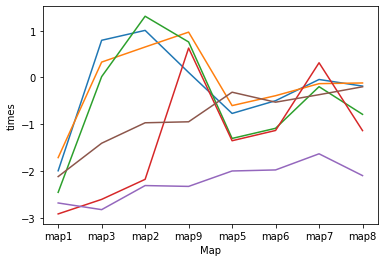

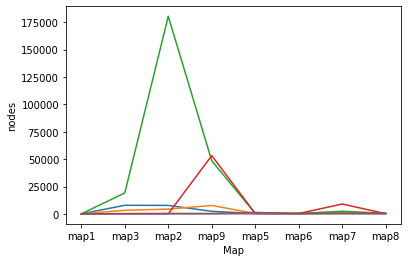

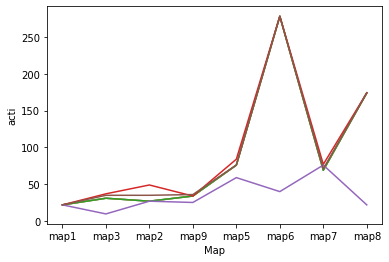

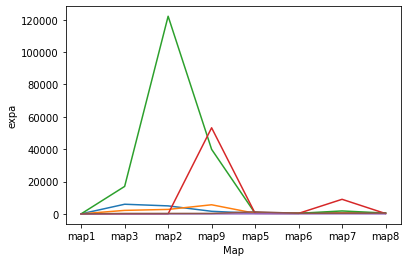

In [98]:
time_metric = "times"
statistic_name = "mean"
data_path = '/content/search_ia_p1/results/with_points/'
maps_array = first_map_array

print("Non-empty, with points, maps (ranked from small to big)")

for metric in metrics:
  if metric == time_metric :
    plot_figure(metric,statistic_name, data_path, maps_array, True)
  else:
    plot_figure(metric,statistic_name, data_path, maps_array, False)

Non-empty, no points, maps (ranked from small to big)


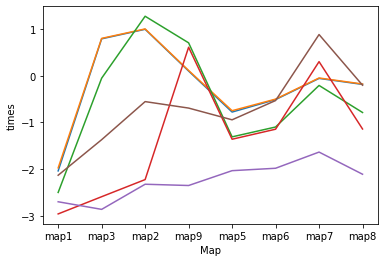

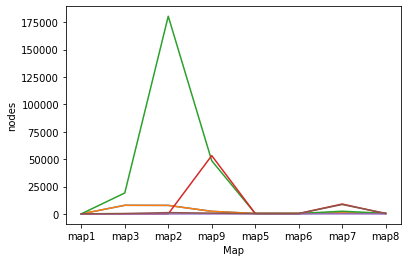

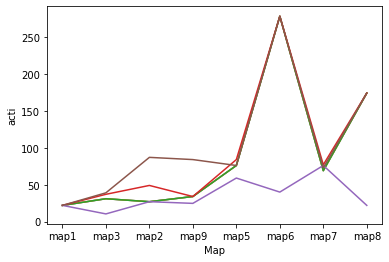

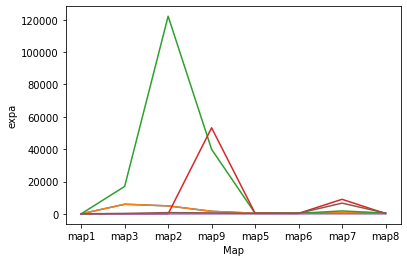

In [99]:
time_metric = "times"
statistic_name = "mean"
data_path = '/content/search_ia_p1/results/no_points/'
maps_array = first_map_array

print("Non-empty, no points, maps (ranked from small to big)")

for metric in metrics:
  if metric == time_metric :
    plot_figure(metric,statistic_name, data_path, maps_array, True)
  else:
    plot_figure(metric,statistic_name, data_path, maps_array, False)

Empty, with points, maps (ranked from small to big)


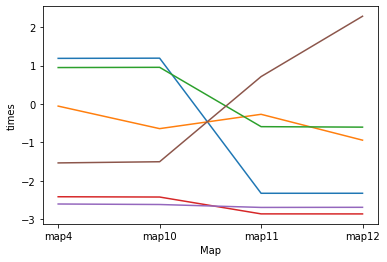

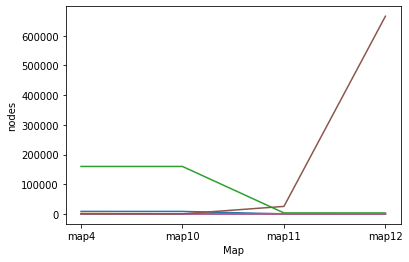

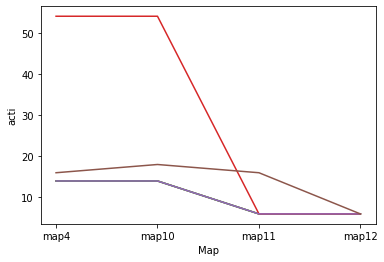

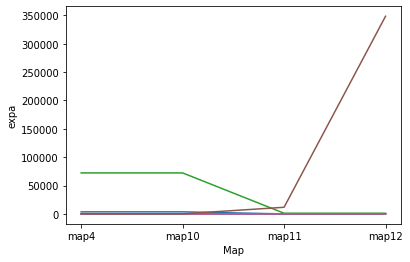

In [100]:
time_metric = "times"
statistic_name = "mean"
data_path = '/content/search_ia_p1/results/with_points/'
maps_array = second_map_array

print("Empty, with points, maps (ranked from small to big)")

for metric in metrics:
  if metric == time_metric :
    plot_figure(metric,statistic_name, data_path, maps_array, True)
  else:
    plot_figure(metric,statistic_name, data_path, maps_array, False)

Empty, no points, maps (ranked from small to big)


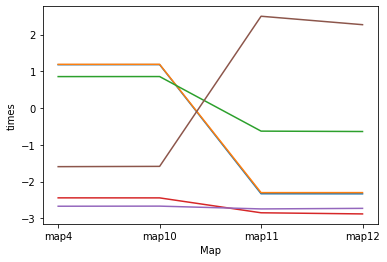

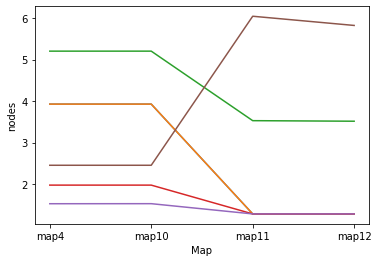

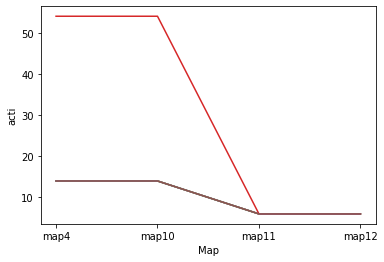

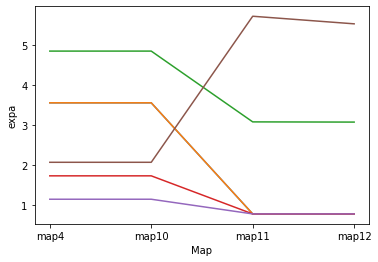

In [101]:
time_metric = "times"
statistic_name = "mean"
data_path = '/content/search_ia_p1/results/no_points/'
maps_array = second_map_array


print("Empty, no points, maps (ranked from small to big)")

for metric in metrics:
  if metric == time_metric or metric == "nodes" or metric == "expa":
    plot_figure(metric,statistic_name, data_path, maps_array, True)
  else:
    plot_figure(metric,statistic_name, data_path, maps_array, False)